In [16]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.mobilenet import MobileNet ,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

### 1. Training with Categorical Classification

In [19]:
train_datagen = ImageDataGenerator(  preprocessing_function = preprocess_input).flow_from_directory(
                                        '/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Train', 
                                        target_size = (224, 224), batch_size = 256)

valid_datagen = ImageDataGenerator( preprocessing_function = preprocess_input).flow_from_directory(
                                    '/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Test', 
                                    target_size = (224, 224), batch_size = 256)

test_datagen = ImageDataGenerator( preprocessing_function = preprocess_input).flow_from_directory(
                                    '/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Validation',
                                    target_size = (224, 224), batch_size = 256)

Found 160000 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [20]:
mobilenet = MobileNet(include_top = False)
x = mobilenet.output

x = GlobalAveragePooling2D()(x) 
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)

preds = Dense(2,activation='softmax')(x)

model = Model(inputs = mobilenet.input, outputs = preds)

for layer in model.layers[:-9]:
    layer.trainable = False

model.compile( optimizer = 'adam',  loss = 'categorical_crossentropy', metrics = ['accuracy'])

<ipython-input-20-cdc996d2f355>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(include_top = False)


In [21]:
filepath = "saved-model-{epoch:02d}.keras"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=False, mode='max')

In [22]:
history = model.fit(
    train_datagen,
    steps_per_epoch=train_datagen.samples // train_datagen.batch_size,
    validation_data=valid_datagen,
    validation_steps=valid_datagen.samples // valid_datagen.batch_size,
    callbacks=[checkpoint],
    epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9202 - loss: 0.2687
Epoch 1: saving model to saved-model-01.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 835s 1s/step - accuracy: 0.9202 - loss: 0.2685 - val_accuracy: 0.9000 - val_loss: 0.2351
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to saved-model-02.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9091 - val_loss: 0.2148
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.9686 - loss: 0.0826
Epoch 3: saving model to saved-model-03.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 517s 819ms/step - accuracy: 0.9686 - loss: 0.0826 - val_accuracy: 0.8285 - val_loss: 0.4750
Epoch 4/10

Epoch 4: saving model to saved-model-04.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8788 - val_loss: 0.2580
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 0.9759 - loss: 0.0643
Epoch 5: saving model to saved-model-05.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 513s 813ms/step - accuracy: 0.9759 - loss: 0.0643 - val_accuracy: 0.9549 - val_loss: 0.1478
Epoch 6/10

Epoch 6: saving model to saved-model-06.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.0000e+00 - loss: 0

### 2. Training with Binary Classification

In [29]:
train_datagen = ImageDataGenerator(  preprocessing_function = preprocess_input).flow_from_directory(
                                        '/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Train', 
                                        target_size = (224, 224), batch_size = 256, class_mode = 'binary')

valid_datagen = ImageDataGenerator( preprocessing_function = preprocess_input).flow_from_directory(
                                    '/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Test', 
                                    target_size = (224, 224), batch_size = 256, class_mode = 'binary')

test_datagen = ImageDataGenerator( preprocessing_function = preprocess_input).flow_from_directory(
                                    '/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Validation',
                                    target_size = (224, 224), batch_size = 256, class_mode = 'binary')

Found 160000 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [30]:
mobilenet = MobileNet(include_top = False)
x = mobilenet.output

x = GlobalAveragePooling2D()(x) 
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)

preds = Dense(1,activation='sigmoid')(x)

model_2 = Model(inputs = mobilenet.input, outputs = preds)

for layer in model.layers[:-9]:
    layer.trainable = False

model_2.compile( optimizer = 'adam',  loss = 'binary_crossentropy', metrics = ['accuracy'])

<ipython-input-30-0f28e365e955>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(include_top = False)


In [31]:
filepath = "saved{epoch:02d}.keras"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=False, mode='max')

In [32]:
history = model_2.fit(
    train_datagen,
    steps_per_epoch=train_datagen.samples // train_datagen.batch_size,
    validation_data=valid_datagen,
    validation_steps=valid_datagen.samples // valid_datagen.batch_size,
    callbacks=[checkpoint],
    epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.9588 - loss: 0.1133
Epoch 1: saving model to saved01.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 713s 1s/step - accuracy: 0.9588 - loss: 0.1132 - val_accuracy: 0.9859 - val_loss: 0.0371
Epoch 2/10

Epoch 2: saving model to saved02.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 931ms/step - accuracy: 0.9883 - loss: 0.0346
Epoch 3: saving model to saved03.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 647s 1s/step - accuracy: 0.9883 - loss: 0.0346 - val_accuracy: 0.9857 - val_loss: 0.0463
Epoch 4/10

Epoch 4: saving model to saved04.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9697 - val_loss: 0.0445
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 932ms/step - accuracy: 0.9907 - loss: 0.0273
Epoch 5: saving model to saved05.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 

### 3. Finding best Model

In [33]:
model_2.evaluate(test_datagen)

89/89 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9830 - loss: 0.0611


[0.0598759651184082, 0.983405590057373]

In [34]:
model_2.evaluate(valid_datagen)

79/79 ━━━━━━━━━━━━━━━━━━━━ 58s 726ms/step - accuracy: 0.9866 - loss: 0.0471


[0.04486498609185219, 0.9870006442070007]

### 4. Getting Inference

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


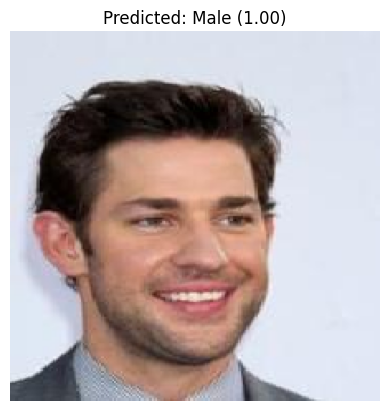

Predicted Class: Male


In [39]:
model = tf.keras.models.load_model("/kaggle/working/saved10.keras")

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert to NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch processing
    img_array = preprocess_input(img_array)  # Apply MobileNet preprocessing

    # Get prediction
    prediction = model.predict(img_array)[0][0]  # Since it's binary classification
    
    # Convert prediction to class label
    class_label = "Male" if prediction > 0.5 else "Female"

    # Show image with prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_label} ({prediction:.2f})")
    plt.show()

    return class_label

path = '/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Train/Male/'
image_path = path + os.listdir('/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Train/Male')[0]

predicted_label = predict_image(image_path)
print(f"Predicted Class: {predicted_label}")

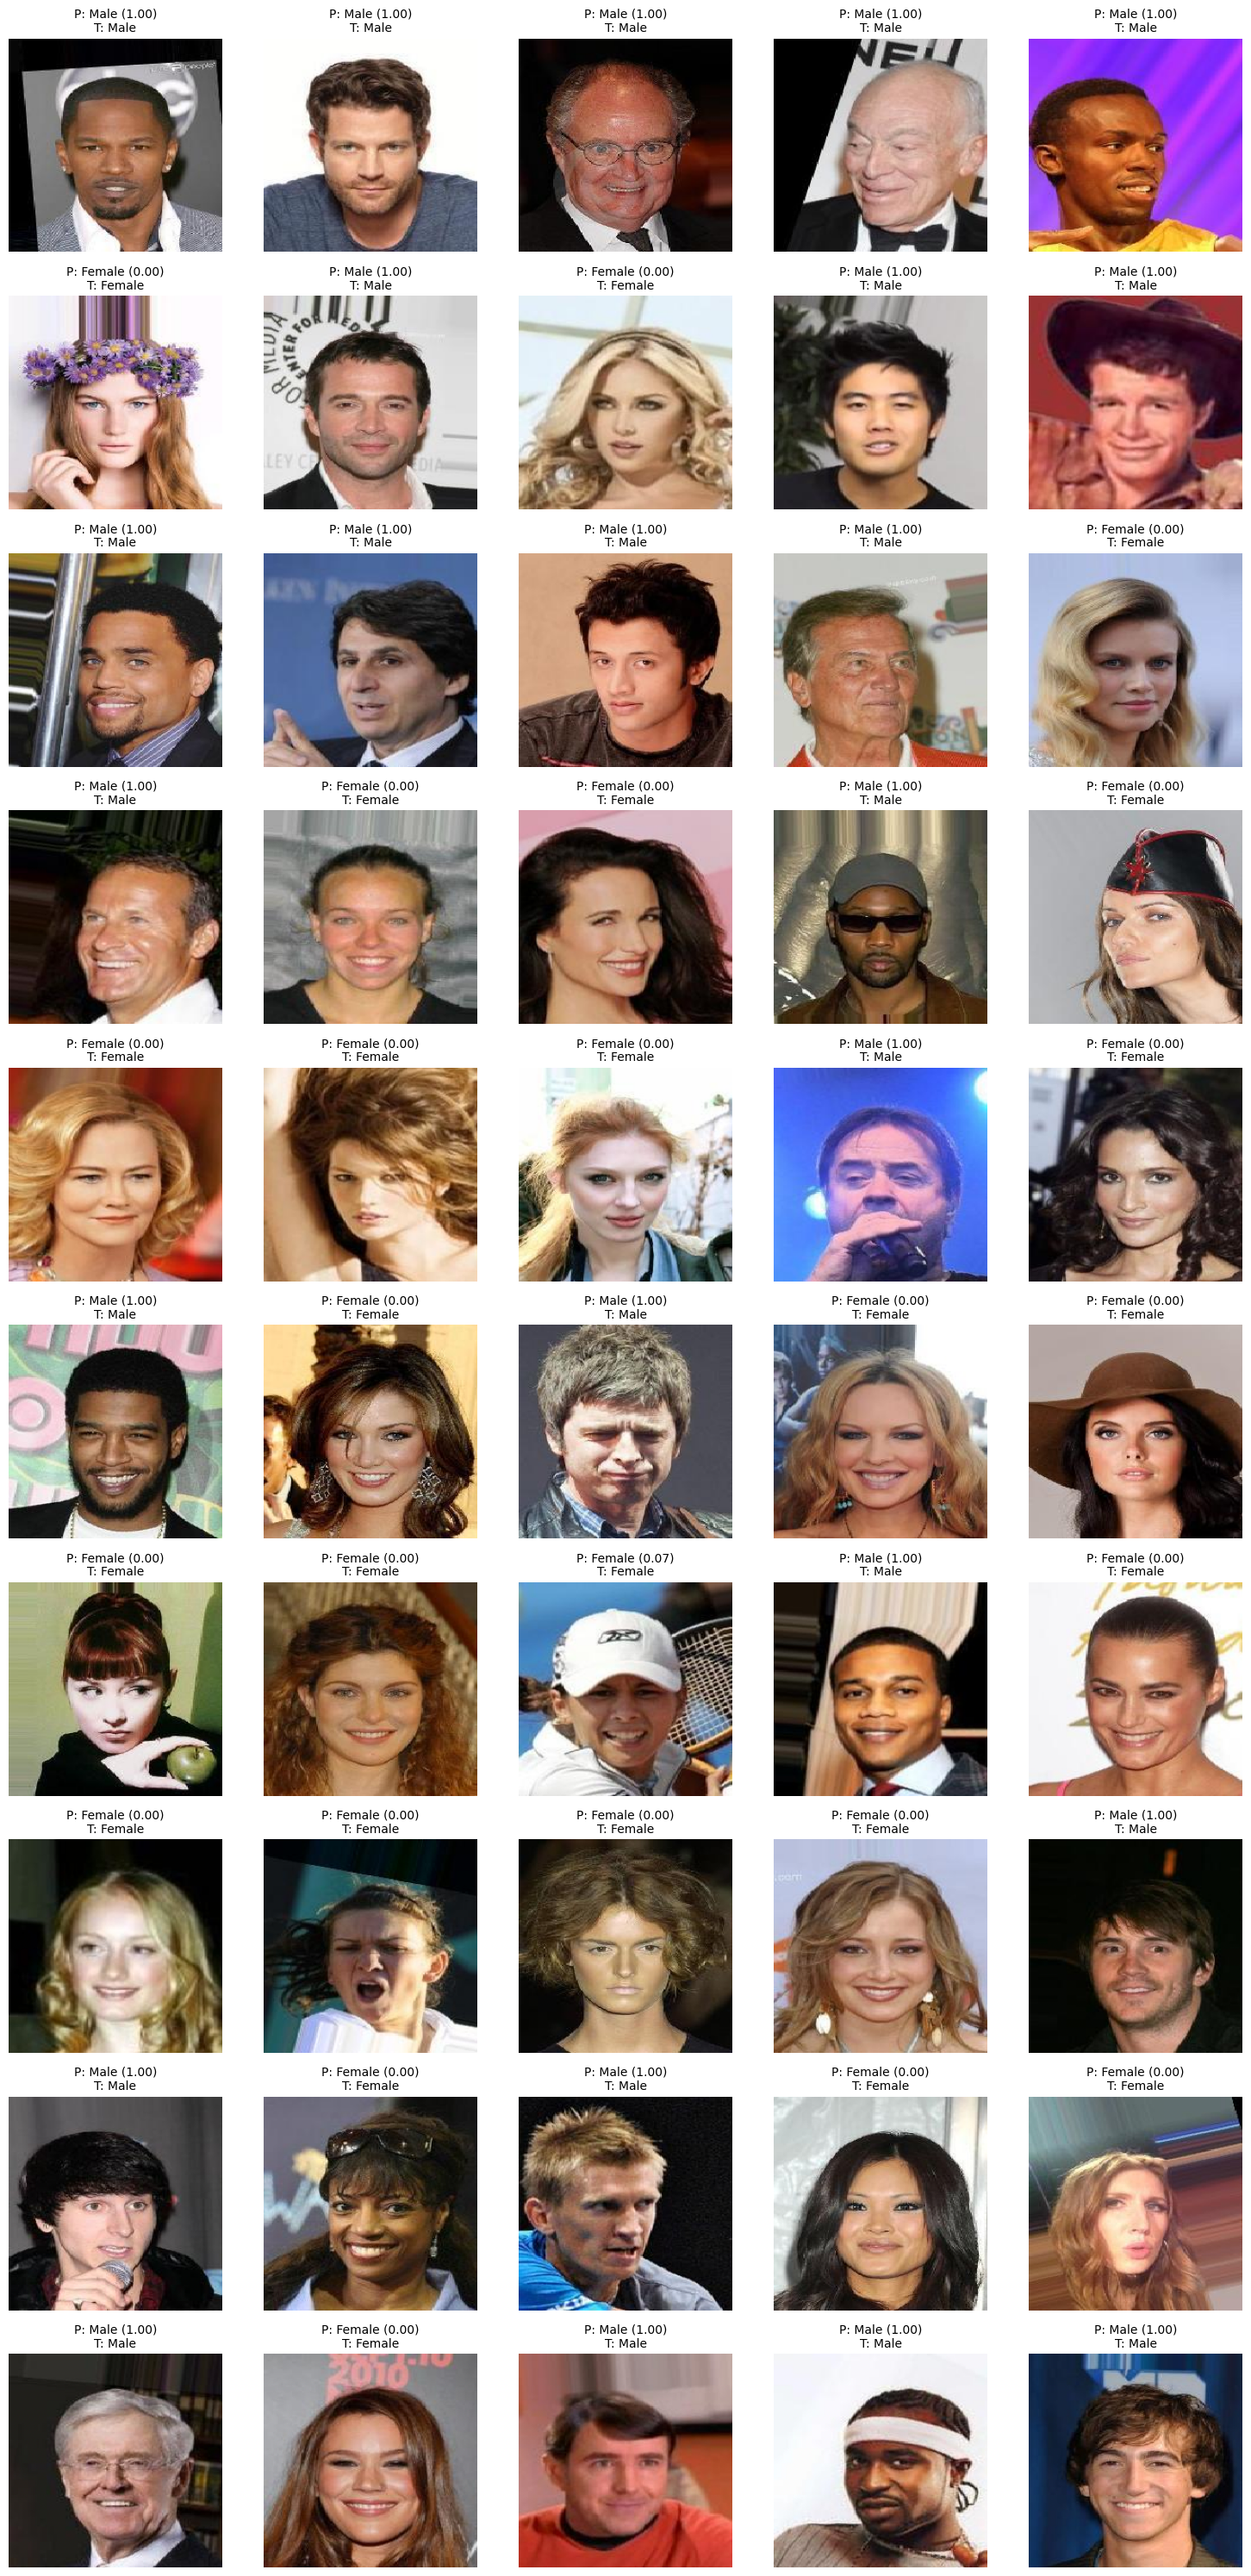

In [44]:
model = tf.keras.models.load_model("/kaggle/working/saved10.keras")

male_path = "/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Train/Male/"
female_path = "/kaggle/input/gender-recognition-200k-images-celeba/Dataset/Train/Female/"

male_images = random.sample(os.listdir(male_path), 25)
female_images = random.sample(os.listdir(female_path), 25)

all_images = [(male_path + img, "Male") for img in male_images] + [(female_path + img, "Female") for img in female_images]
random.shuffle(all_images)

def predict_image(img_path):

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array, verbose = 0)[0][0]  # Since it's binary classification
    class_label = "Male" if prediction > 0.5 else "Female"
    
    return img, class_label, prediction  # Return image object, label, and confidence score

# Create 10x5 subplot
fig, axes = plt.subplots(10, 5, figsize=(15, 30))

for i, (img_path, true_label) in enumerate(all_images):
    img, predicted_label, confidence = predict_image(img_path)
    ax = axes[i // 5, i % 5]  # Calculate subplot position
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"P: {predicted_label} ({confidence:.2f})\nT: {true_label}", fontsize=10)

plt.tight_layout()
plt.show()